# INSTALLATION TEST

In [11]:
# CHANGE TO THE PATH ON YOUR SYSTEM WHERE THE **test data** folder resides
dataroot="/Users/josefk/github/public/openSAR/training/data/test"

See if you have a correct installation by selecting

    > Kernel > Change Kernel > Python[conda env:ebd]
    (other Kernels might be ok too)
    
    > Cell > Run All

## Python package import

In [5]:
# Generic
import os

# Data Analysis packages
import pandas as pd
import gdal
import numpy as np

# Plotting packages
# MATPLOTLIB
%matplotlib inline
import matplotlib.pylab as plt
# BOKEH
import bokeh.plotting as bplt
bplt.output_notebook()


Loading BokehJS ...

## Test Data Import

**Set the data path and filename**

In [16]:
datapath='.'
datefile ='S32631X402380Y1491460sS1_A_vh_mtfil.dates'
imagefile='S32631X402380Y1491460sS1_A_vh_mtfil.vrt'
os.chdir(os.path.join(dataroot,datapath))

### Time series indices

In [22]:
# Get the date indices via pandas
dates=open(datefile,"r").readlines()
tindex=pd.DatetimeIndex(dates)
tindex

DatetimeIndex(['2015-04-03', '2015-11-17', '2015-11-29', '2015-12-11',
               '2015-12-23', '2016-01-04', '2016-01-28', '2016-02-09',
               '2016-03-04', '2016-03-16', '2016-03-28', '2016-04-09',
               '2016-04-21', '2016-05-03', '2016-05-15', '2016-05-27',
               '2016-06-08', '2016-07-02', '2016-07-14', '2016-07-26',
               '2016-08-07', '2016-08-19', '2016-08-31', '2016-09-12',
               '2016-09-24', '2016-10-06', '2016-10-18', '2016-10-30',
               '2016-11-11', '2016-11-23', '2016-12-05', '2016-12-17',
               '2016-12-29', '2017-01-10', '2017-01-22', '2017-02-03',
               '2017-02-15', '2017-02-27', '2017-03-11', '2017-03-23',
               '2017-04-04', '2017-04-16', '2017-04-28', '2017-05-10',
               '2017-05-22', '2017-06-03', '2017-06-15', '2017-06-27',
               '2017-07-09', '2017-07-21', '2017-08-02', '2017-08-14',
               '2017-08-26', '2017-09-07', '2017-09-19', '2017-10-13',
      

### Image data

In [24]:
img=gdal.Open(imagefile)

In [26]:
raster=img.ReadAsArray()

Text(0.5,1,'2015-04-03')

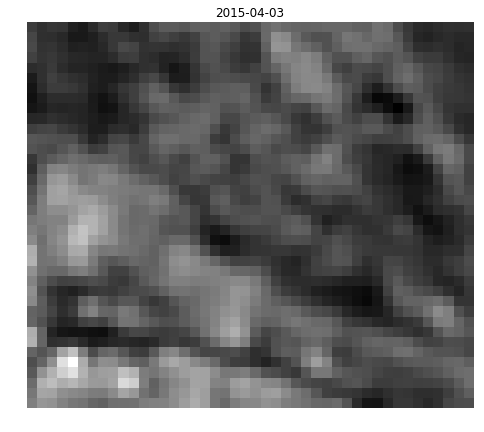

In [44]:
fig,ax = plt.subplots(figsize=(8,8))
ax.axis('off')
ax.imshow(raster[0],cmap='gray')
ax.set_title(tindex[0].date())

In [46]:
fig = bplt.figure()
fig.image([raster[0]/raster[0].max()],0,0,img.RasterXSize,img.RasterYSize)
bplt.show(fig)